In [2]:
using Plots

import CMF

┌ Info: Precompiling CMF [db662885-8e4b-5931-925d-197754c06cb4]
└ @ Base loading.jl:1186


### Load data

In [3]:
spect = CMF.piano(path="/home/anthony/cmf_data/prelude_bach.wav");

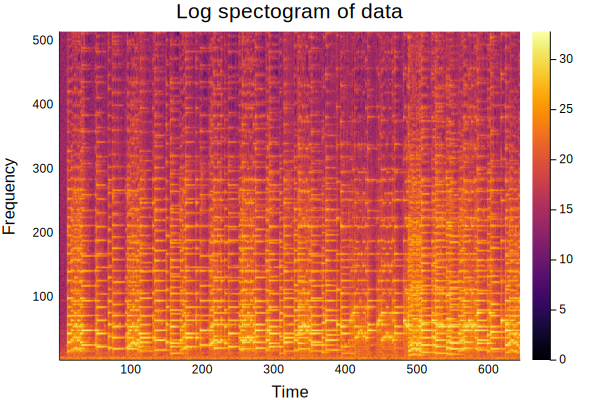

In [4]:
# Clean data
data = log.(spect) .- minimum(log.(spect))


# Plot data
heatmap(data)
plot!(xlabel="Time", ylabel="Frequency", title="Log spectogram of data")

### Fit model

In [5]:
n_components, lag = 4, 100

results = CMF.fit_cnmf(data, L=lag, K=n_components, alg=:hals,
                   max_itr=1_000_000, max_time=30)
;

### Plot results

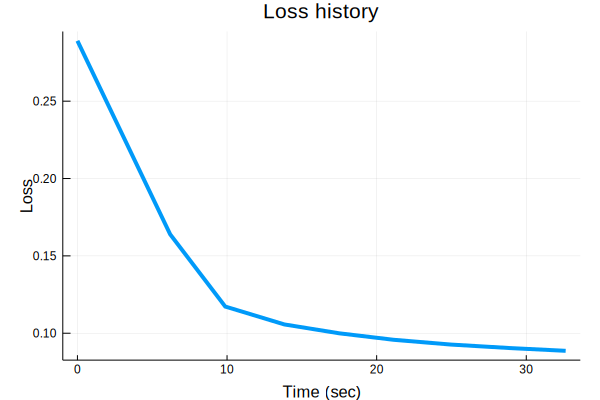

In [6]:
# Loss history

plot(
    results.time_hist, results.loss_hist,
    xlabel="Time (sec)", ylabel="Loss",
    label="", lw=4, title="Loss history"
)

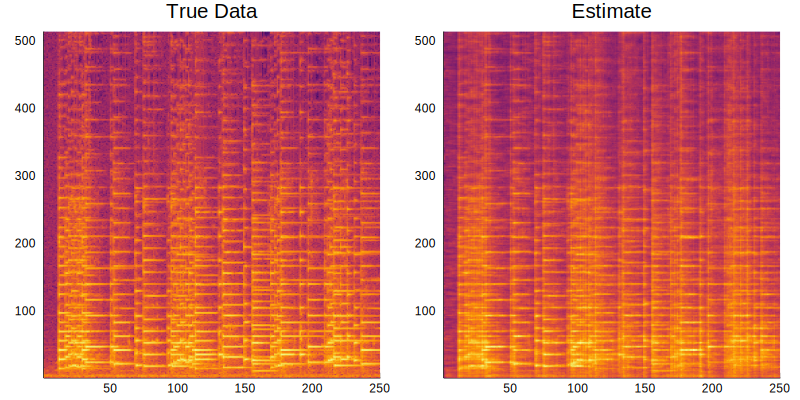

In [14]:
W, H = results.W, results.H

t_start = 1
t_end = 250

p = heatmap(
    data[:, t_start:t_end], layout=grid(1, 2), size=(800, 400), colorbar=false, clim=(0, 32.5),
    title="True Data"
)
heatmap!(
    p[2], CMF.tensor_conv(W, H)[:, t_start:t_end], colorbar=false, clim=(0, 32.5),
    title="Estimate"
)